# K-Means Clustering

### NAME - SOURAV SAHOO

## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### IMPORT THE DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### LOAD AND UNDERSTAND THE DATASET

In [3]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

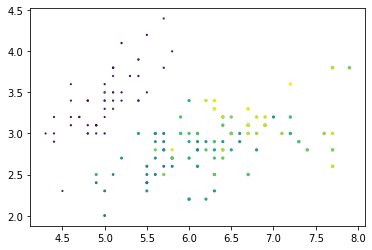

In [32]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'],data['PetalWidthCm'],marker='o')

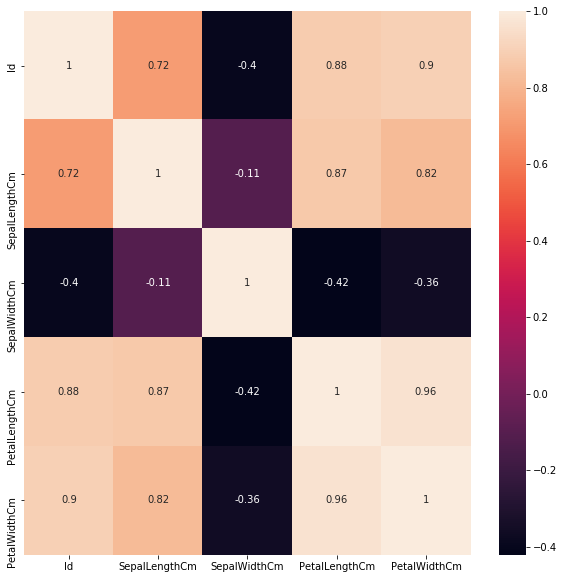

In [5]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

### OUTLIER TREATMENT

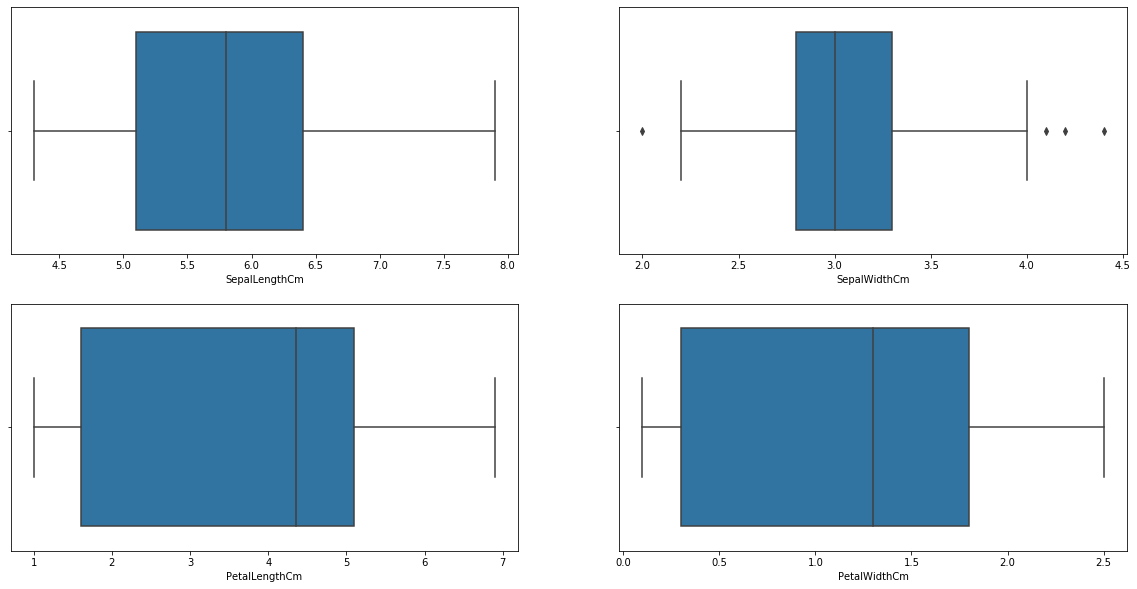

In [8]:
fig,axs = plt.subplots(2,2,figsize=(20,10))
plt1 = sns.boxplot(data['SepalLengthCm'],ax = axs[0,0])
plt2 = sns.boxplot(data['SepalWidthCm'],ax = axs[0,1])
plt3 = sns.boxplot(data['PetalLengthCm'],ax = axs[1,0])
plt4 = sns.boxplot(data['PetalWidthCm'],ax = axs[1,1])

In [11]:
x = data.iloc[:,1:5]

### ELBOW METHOD TO DETERMINE THE NUMBER OF CLUSTERS

In [20]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)

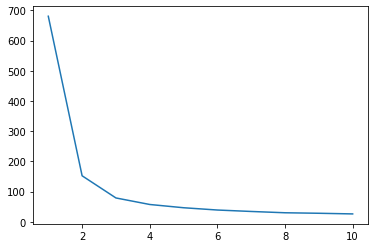

In [21]:
plt.plot(range(1,11),wcss)

#### AS WE CAN SEE THE ELBOW BENDS AT POSITION 3. SO WE CONCLUDE THERE WILL BE 3 CLUSTERS.

In [35]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)

In [36]:
group=model.fit_predict(x)

#### SEPARATE THE DATA WITH DIFFERENT CLUSTERS

In [37]:
data['group'] = group

In [38]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,group
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [39]:
cluster1=data[data['group']==0]
cluster2=data[data['group']==1]
cluster3=data[data['group']==2]

#### VISUALIZE THE CLUSTERS 

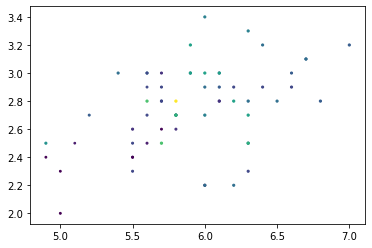

In [40]:
plt.scatter(cluster1['SepalLengthCm'],cluster1['SepalWidthCm'],cluster1['PetalLengthCm'],cluster1['PetalWidthCm'])

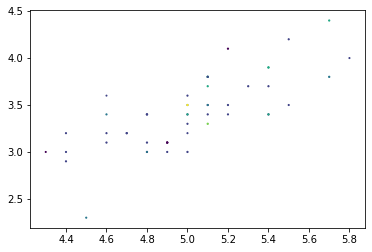

In [41]:
plt.scatter(cluster2['SepalLengthCm'],cluster2['SepalWidthCm'],cluster2['PetalLengthCm'],cluster2['PetalWidthCm'])

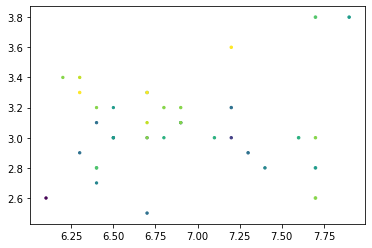

In [42]:
plt.scatter(cluster3['SepalLengthCm'],cluster3['SepalWidthCm'],cluster3['PetalLengthCm'],cluster3['PetalWidthCm'])